In [1]:
from unityagents import UnityEnvironment
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

from ddpg_agent import Agent

In [2]:
env = UnityEnvironment(file_name='Reacher_Linux/Reacher.x86_64',seed=0)

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]

num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [3]:
agent = Agent(state_size,action_size,random_seed=0)

Initialising ReplayBuffer


In [4]:
def ddpg(num_episodes=300, max_time=1000):
    scores_window = deque(maxlen=100)
    scores_all = []


    for episode in range(1, num_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations

        scores = np.zeros(num_agents)
        for t in range(max_time):
            actions = []
            for j in range(num_agents):
                agent.reset()
                actions.append(agent.act(np.array([states[j]])))
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done

            for i in range(num_agents):
                agent.step(t, states[i], actions[i], rewards[i], next_states[i], dones[i])

            states = next_states
            scores += rewards
            agent.learnParams()
            if t % 20:
                print('\rTimestep {}\tScore: {:.2f}\tmin: {:.2f}\tmax: {:.2f}'
                      .format(t, np.mean(scores), np.min(scores), np.max(scores)), end="")
            if np.any(dones):
                break
        score = np.mean(scores)
        scores_window.append(score)
        scores_all.append(score)

        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(episode, score, np.mean(scores_window)),
              end="\n")
        if episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_window)))
        if np.mean(scores_window) >= 30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode - 100,
                                                                                         np.mean(scores_window)))
            torch.save(Agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(Agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break

    return scores_all

Episode 1	Score: 0.46	Average Score: 0.46.19
Episode 2	Score: 0.64	Average Score: 0.55.25
Episode 3	Score: 0.44	Average Score: 0.51.32
Episode 4	Score: 0.68	Average Score: 0.55.44
Episode 5	Score: 0.69	Average Score: 0.58.91
Episode 6	Score: 0.45	Average Score: 0.56.96
Episode 7	Score: 0.32	Average Score: 0.53.97
Episode 8	Score: 0.37	Average Score: 0.51.21
Episode 9	Score: 0.60	Average Score: 0.52.10
Episode 10	Score: 0.79	Average Score: 0.5463
Episode 11	Score: 0.73	Average Score: 0.5630
Episode 12	Score: 0.74	Average Score: 0.5830
Episode 13	Score: 0.74	Average Score: 0.5925
Episode 14	Score: 0.29	Average Score: 0.5794
Episode 15	Score: 0.83	Average Score: 0.5899
Episode 16	Score: 0.90	Average Score: 0.6054
Episode 17	Score: 0.82	Average Score: 0.6226
Episode 18	Score: 0.82	Average Score: 0.6313
Episode 19	Score: 0.84	Average Score: 0.6431
Episode 20	Score: 0.92	Average Score: 0.6517
Episode 21	Score: 1.26	Average Score: 0.6891
Episode 22	Score: 1.59	Average Score: 0.7207
Episode 23

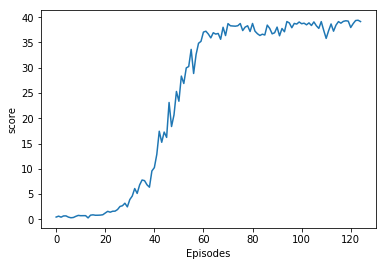

In [5]:
scores = ddpg()


fig = plt.figure()
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('score')
plt.xlabel('Episodes')
plt.show()